In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
train=pd.read_csv("/content/loan_train.csv")

In [196]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
393,LP002265,Male,Yes,2,Not Graduate,No,1993,1625.0,113.0,180.0,1.0,Semiurban,Y
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.0,158.0,360.0,1.0,Urban,Y
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y
481,LP002536,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural,Y
421,LP002357,Female,No,0,Not Graduate,No,2720,0.0,80.0,NaN,0.0,Urban,N
360,LP002161,Female,No,1,Graduate,No,4723,0.0,81.0,360.0,1.0,Semiurban,N
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
339,LP002114,Female,No,0,Graduate,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y


In [197]:
train.shape

(614, 13)

In [198]:
train.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [200]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [201]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [202]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


<Axes: >

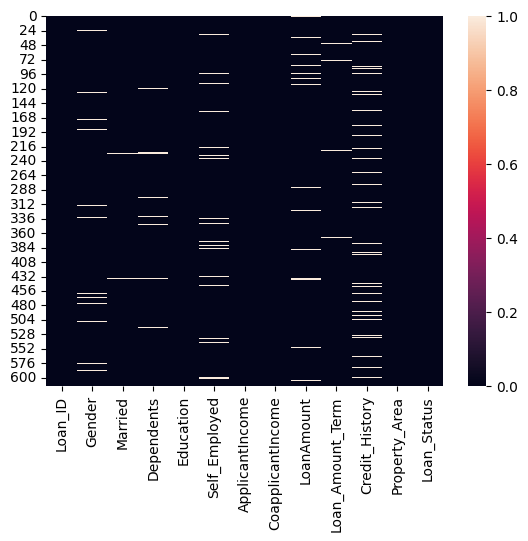

In [203]:
sns.heatmap(train.isnull())

***Now Handle Missing Values Either they are categorical or numerical***

In [204]:
#Gender
train['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [205]:
#Here the no. of male is higher so fill the missing value by Male
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

/tmp/ipython-input-812408714.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)


In [206]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [207]:
#Fill the missing value in married with married
train['Married'].fillna(train['Married'].mode()[0], inplace=True)


/tmp/ipython-input-1127684122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Married'].fillna(train['Married'].mode()[0], inplace=True)


In [208]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [209]:
#Fill the missing value in Dependents with most frequent value
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

/tmp/ipython-input-112139835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)


In [210]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [211]:
#Fill the missing value in Self_Employed with most frequent value
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

/tmp/ipython-input-3887923415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)


In [212]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14



***Now fill numerical missing variables***


***for LoanAmount***

In [213]:
#loan amount mean
mean_LoanAmount=train['LoanAmount'].mean()
mean_LoanAmount


np.float64(146.41216216216216)

In [214]:
std_LoanAmount=train['LoanAmount'].std()
std_LoanAmount

85.58732523570545

In [215]:
low_LoanAmount=mean_LoanAmount-std_LoanAmount
low_LoanAmount

np.float64(60.82483692645671)

In [216]:
high_LoanAmount=mean_LoanAmount+std_LoanAmount
high_LoanAmount

np.float64(231.9994873978676)

In [217]:
random_LoanAmount=np.random.randint(85,231,22).astype(float)
random_LoanAmount

array([149., 133., 188., 167., 218.,  85., 114., 101., 141., 127., 126.,
       196., 102., 214., 205.,  96., 191., 125., 144., 216., 146., 224.])

In [218]:
LoanAmount_copy=train['LoanAmount'].copy()
LoanAmount_copy


,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [219]:
LoanAmount_copy[np.isnan(LoanAmount_copy)]=random_LoanAmount
LoanAmount_copy

,LoanAmount
0,149.0
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [220]:
train['LoanAmount']=LoanAmount_copy

In [221]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


***for Loan_Amount_Term***

In [222]:
#loan amount term mean
mean_Loan_Amount_Term=train['Loan_Amount_Term'].mean()
mean_Loan_Amount_Term

np.float64(342.0)

In [223]:
std_Loan_Amount_Term=train['Loan_Amount_Term'].std()
std_Loan_Amount_Term

65.12040985461256

In [224]:
low_Loan_Amount_Term=mean_Loan_Amount_Term-std_Loan_Amount_Term
low_Loan_Amount_Term

np.float64(276.87959014538745)

In [225]:
high_Loan_Amount_Term=mean_Loan_Amount_Term+std_Loan_Amount_Term
high_Loan_Amount_Term

np.float64(407.12040985461255)

In [226]:
random_Loan_Amount_Term=np.random.randint(276,407,14).astype(float)
random_Loan_Amount_Term

array([298., 317., 383., 334., 340., 357., 384., 321., 296., 374., 386.,
       393., 357., 363.])

In [227]:
Loan_Amount_Term_copy=train['Loan_Amount_Term'].copy()
Loan_Amount_Term_copy


,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
...,...
609,360.0
610,180.0
611,360.0
612,360.0


In [228]:
Loan_Amount_Term_copy[np.isnan(Loan_Amount_Term_copy)]=random_Loan_Amount_Term
Loan_Amount_Term_copy

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0
...,...
609,360.0
610,180.0
611,360.0
612,360.0


In [229]:
train['Loan_Amount_Term']=Loan_Amount_Term_copy

In [230]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [231]:
#only  one column of Credit_History is have missing value
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

/tmp/ipython-input-1347300656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [232]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: xlabel='Loan_Status', ylabel='count'>

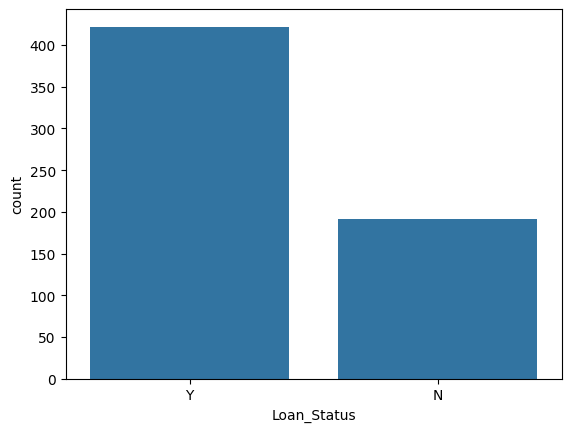

In [233]:
sns.countplot(x='Loan_Status', data=train)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

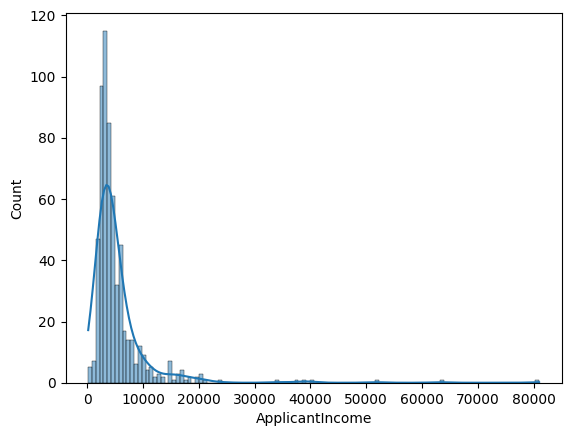

In [234]:
sns.histplot(train['ApplicantIncome'], kde=True)

<Axes: xlabel='Education', ylabel='count'>

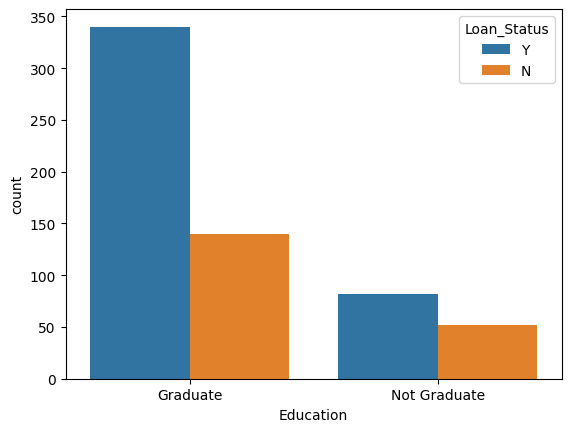

In [235]:
sns.countplot(x='Education', hue='Loan_Status', data=train)

<Axes: xlabel='Married', ylabel='count'>

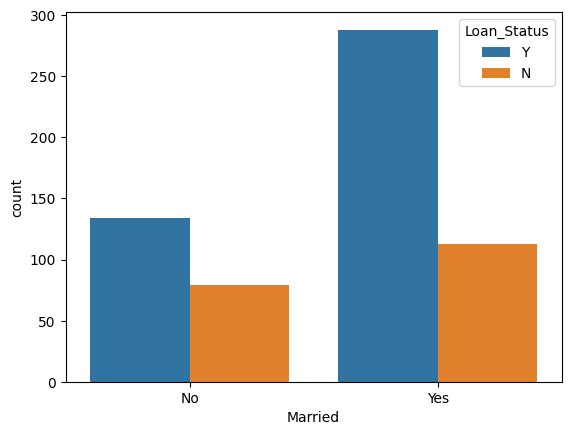

In [236]:
sns.countplot(x='Married', hue='Loan_Status', data=train)

<Axes: xlabel='Gender', ylabel='count'>

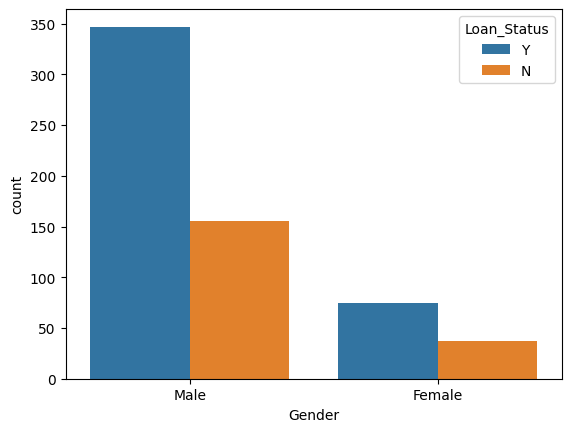

In [237]:
sns.countplot(x='Gender', hue='Loan_Status', data=train)

<Axes: xlabel='Credit_History', ylabel='count'>

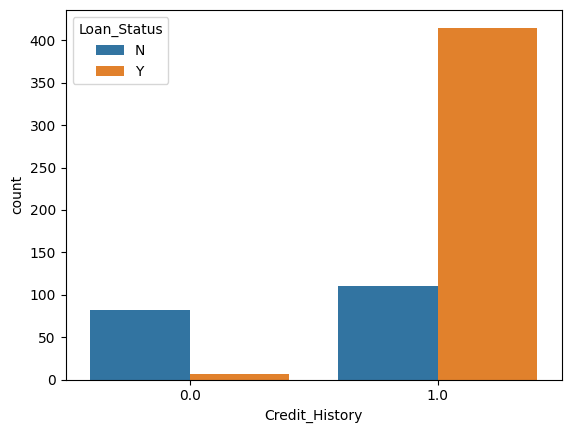

In [238]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)

<Axes: xlabel='Property_Area', ylabel='count'>

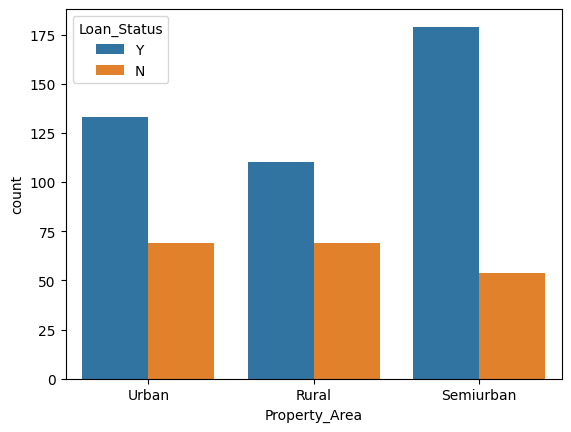

In [239]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train)

<Axes: xlabel='LoanAmount'>

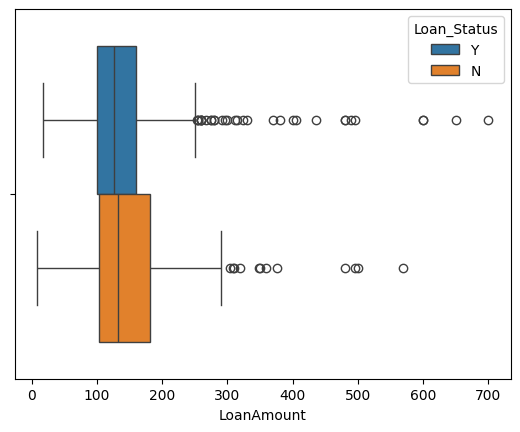

In [240]:
sns.boxplot(x='LoanAmount', hue='Loan_Status', data=train)

<Axes: xlabel='ApplicantIncome'>

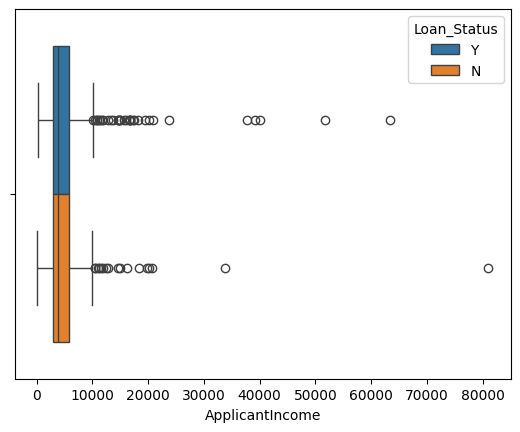

In [241]:
sns.boxplot(x='ApplicantIncome', hue='Loan_Status', data=train)

***Now convert categorical data into Numerical***

In [242]:
train['Gender']=train['Gender'].map({'Male':1,'Female':0})

In [243]:
train.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
521,LP002690,1,No,0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,Y
275,LP001900,1,Yes,1,Graduate,No,2750,1842.0,115.0,360.0,1.0,Semiurban,Y
332,LP002100,1,No,0,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
486,LP002545,1,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
216,LP001722,1,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
26,LP001068,1,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
586,LP002916,1,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
21,LP001046,1,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
251,LP001836,0,No,2,Graduate,No,3427,0.0,138.0,360.0,1.0,Urban,N
254,LP001844,1,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N


In [244]:
train['Education']=train['Education'].map({'Graduate':1,'Not Graduate':0})

In [245]:
train['Self_Employed'] = train['Self_Employed'].map({'Yes': 1, 'No': 0})


In [246]:
train['Married'] = train['Married'].map({'Yes': 1, 'No': 0})

In [247]:
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

In [248]:
train['Dependents'] = train['Dependents'].replace('3+', 4)

In [249]:
train['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [250]:
property_loc = pd.get_dummies(train["Property_Area"], drop_first=True).astype(int)
property_loc.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [251]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,149.0,360.0,1.0,Urban,1


In [252]:
train.drop(["Loan_ID","Property_Area"],axis=1,inplace=True)

In [253]:
train=pd.concat([train,property_loc],axis=1)

In [254]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,149.0,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,1


In [255]:
X=train.drop("Loan_Status",axis=1)
Y=train["Loan_Status"]

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [258]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(460, 12) (154, 12) (460,) (154,)


In [259]:
X.shape

(614, 12)

In [260]:
Y.shape

(614,)

In [261]:
model=LogisticRegression()

In [262]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [263]:
x_train_prediction = model.predict(x_train)
x_train_prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [264]:
accuracy_train = accuracy_score(y_train,x_train_prediction)
accuracy_train

0.8195652173913044

In [265]:
x_test_prediction = model.predict(x_test)
x_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [266]:
accuracy_test = accuracy_score(y_test,x_test_prediction)
accuracy_test

0.7792207792207793

In [267]:
y_test.value_counts()

,count
Loan_Status,
1,100
0,54


In [268]:
y_train.value_counts()

,count
Loan_Status,
1,322
0,138


In [269]:
import pickle


In [270]:
with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [271]:
with open("model.pkl","rb") as f:
    loaded_model = pickle.load(f)

In [273]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,149.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1
